## Top Ten Most Frequent Words in Star Trek the Next Generation
The following script finds the ten most frequent words in Start Trek the Next Generation either the whole series, a whole season, or a single episode. Many times top ten analyses are used to find the top ten words overall, but this particular script strips out stopwords so the resulting top ten words shed light on the top ten thematic words.

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.     

### Run CyberDH environment
The code in the cell below points to a module specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different pakcages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by simply typing "pip install nameofpackage --user" (minus the quotes). 


- **nltk:** Platform for building Python programs to work with human language data.

- **os:** This module provides a portable way of using operating system dependent functionality.

- **string:** contains a number of useful constants and classes, as well as some deprecated legacy functions that are also available as methods on strings.

- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers: dict, list, set, and tuple.

- **operator:** Exports a set of functions corresponding to the intrinsic operators of Python.

- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

- **numpy:** The fundamental package for scientific computing with Python.

- **re:** Provides regular expression matching operations similar to those found in Perl.

- **math:** Provides access to the mathematical functions defined by the C standard.


In [2]:
from nltk.corpus import stopwords
import os
import string
from collections import defaultdict
import operator
import matplotlib.pyplot as plt
import numpy as np
import re
import math

#### File paths
Here we are saving as variables different file paths that we need in our code. 

First we us the 'os' package above to find our 'HOME' directory using the 'environ' function. This will work for any operating system, so if you decide to try this out on your personal computer instead of ReD, the *homePath* variable will still be the path to your 'home' directory, so no changes are needed.

Next, we combine the *homePath* file path with the folder names that lead to where our data is stored. Note that we do not use any file names yet, just the path to the folder. This is because we may want to read in all the files in the directory, or just one. There are options below for doing both. We save the path as a variable named *dataHome*.

Now we add the *homePath* file path to other folder names that lead to a folder where we will want to save any output generated by this code. We again will change the file names in the appropriate cells down below. We save this file path as the variable *dataResults*.

Lastly, we use the file path from *dataHome* to point to the directory where our data is stored and save that as *corpusRoot*.

In [3]:
homePath = os.environ['HOME']
dataHome = os.path.join(homePath, 'Text-Analysis-DavidBranchV2', 'data', 'shakespeareFolger')
dataResults = os.path.join(homePath, 'Text-Analysis-DavidBranchV2', 'Output')

### Set needed variables
This is where you will make some decisions about your data and set the necessary variables.

If your data is in '.txt' format, then you need to determine if you want to read in a single document or an entire directory. If you want to read in a single document, then set *singleDoc* equal to **True**. If you want to read in an entire directory of documents then set *singleDoc* equal to **False**.

The *nltkStop* is where you determine if you want to use the built in stopword list provided by the NLTK package. They provide stopword lists in multiple languages. If you wish to use this then set *nltkStop* equal to **True**. If you do not, then set *nltkStop* equal to **False**.

Lastly, customStop is for if you have a .txt file that contains additional stopwords that you would like to read in and have added to the existing stopWords list. You do **NOT** need to use the NLTK stopwords list in order to add your own custom list of stopwords. **NOTE: Your custom stopwords file needs to have one word per line as it reads in a line at a time and the full contents of the line is read in and added to the existing stopwords list.** If you have a list of your own then set *customStop* equal to **True**. If you do not have your own custom stopwords list then set *customStop* equal to **False**.

In [4]:
singleDoc = False
nltkStop = True
customStop = True
stopWords = []

### Stopwords
If you set nltkStop equal to **True** above then this will add the NLTK stopwords list to the empty list named stopWords.

If you need a different language, simply change 'english' (keep the quotes) in *stopWords.extend(stopwords.words('english'))* to the anglicized name of the language you wish to use (e.g. 'spanish' instead of 'espanol' or 'german' instead of 'deutsch'). If you wish to add additional words to the stopWords list, add the word in quotes to the list in *stopWords.extend(['the', 'words', 'you', 'want', 'to', 'add'])*.

If you need to see the list of available languages in nltk simply remove the '#' from in front of the last line and run the cell. A list of available languages will print out. 

In [5]:
# NLTK Stop words
if nltkStop is True:
    stopWords.extend(stopwords.words('english'))

    stopWords.extend(['would', 'said', 'says', 'also', 'good', 'lord', 'come'])

#print(" ".join(stopwords.fileids()))

#### Add own stopword list

Here is where your own stopwords list is added if you selected **True** in "customStop" above. Here you will need to change the folder names and file name to match your folders and file. Remember to put each folder name in quotes and in the correct order always putting the file name including the file extension (.txt) last.

In [6]:
if customStop is True:
    stopWordsFilepath = os.path.join(homePath, "IntroTextAnalysis", "data", "earlyModernStopword.txt")

    with open(stopWordsFilepath, "r",encoding = 'utf-8') as stopfile:
        stopWordsCustom = [x.strip() for x in stopfile.readlines()]

    stopWords.extend(stopWordsCustom)

### Functions
We need to create a few functions in order to calculate and plot the ten most frequent words.Any time you see 'def' (without the quotes) the means we are DEclaring a Function. The 'def' is usually followed by the name of the function being created and then in parentheses are the arguments the function requires. After the parentheses is a colon, which closes the declaration, then a bunch of code below which is indented. The indented code is the program statement or statements to be executed or in other words what the function is doing. Once you have created your function all you need to do in order to run it is call the function by name and make sure you have included all the required arguments in the parentheses. This allows you to do what the function does without having to write out all the code in the function every time you wish to perform that task.

#### Text Cleaning
The first function does some text cleaning for us and requires the text being cleaned and whether or not there is a stopword list for arguments. Now come the statements to be executed. First we lowercase the text or else 'Love' and 'love' will be counted as two different words, so we make them all 'love'. Then we split the text into individual words and remove empty spaces. Then we remove any digits, stopwords, and punctuation and return a list of cleaned words.

In [7]:
def textClean(text):
    
    text = text.strip().lower()
    
    tokens = re.split(r'\W+', text)
    
    # remove empty string
    tokens = [t for t in tokens if t]
    
    # remove digits
    tokens = [t for t in tokens if not t.isdigit()]
    
    # built-in stop words list
    tokens = [t for t in tokens if t not in stopWords]
        
    # remove punctuation
    puncts = list(string.punctuation)
    puncts.append('--')

    tokens = [t for t in tokens if t not in puncts]

    return tokens

#### Frequency count

Now we need a function to count all the words and put them in order from most frequent to least frequent. The first four lines say that we are creating a function that creates a dictionary that adds '1' next to a word in that dictionary every time that word is used. The last line says that we are sorting that dictionary from the highest number to the lowest number.

In [8]:
"""
Get sorted frequency in descending order
"""
def getFreq(tokens):
    
    freq = defaultdict(int)

    for t in tokens:
        freq[t] += 1
    
    # sorted frequency in descending order
    return sorted(freq.items(), key = operator.itemgetter(1), reverse = True)

#### Plot Graph

This next function describes how we want to plot or visualize our results. We name this function 'plotTopTen' and it begins by pulling only the top ten words from our sorted frequency above and printing them in a list. Then it says we want a barplot (plt.bar) and the rest describes different aspects of the barplot, such as what we want for the x and y axis, the centering of the graph, the colors of the bars, the labels and titles of the graph, and how to save a .png file of the visualization so we can use it in future presentations or publications.

In [9]:
def plotTopTen(sortedFreq, title, imgFilepath, dpi):
    
    topn = 15

    for t in sortedFreq[0 : topn]:
        
        print('{} : {}'.format(t[0], t[1]))
    
    topNWords = [w for w in sortedFreq[0 : topn]]

    x_pos = np.arange(len(topNWords))
    cnts = [w[1] for w in topNWords]

    plt.rcdefaults()

    plt.bar(x_pos, cnts, align = 'center', alpha = 0.5, color = ['red', 
                                                             'orange', 'yellow', 'green', 'blue',
                                                             'darkorchid', 'darkred', 'darkorange', 
                                                             'gold', 'darkgreen'])
    

        
    plt.xticks(x_pos, [w[0] for w in topNWords])
    plt.xticks(rotation = 45)
        
    xlabel = plt.xlabel('Words')
    xlabel.set_color('red')
    ylabel = plt.ylabel('Frequency')
    ylabel.set_color('red')
    
    high = max(cnts)
    low = 0
    
    plt.ylim(low, math.ceil(high + 0.1 * (high - low)))
    
    for xpos, count in zip(x_pos, cnts):
    
        plt.text(x = xpos, y = count + 1, s = str(count), ha = 'center', va = 'bottom')

    plt.title(title)
 
    plt.savefig(imgFilepath, format = 'png', dpi = dpi, bbox_inches = 'tight')
    
    plt.show()

#### Pull from a single file

This function reads a single file from which we will be counting and ploting the top ten words. This function opens the file, reads it, then applies the cleaning function we created above and adds the ability to include an additional stopword list if needed.

In [10]:
def getTokensFromSingleText(textFilepath):
    
    with open(textFilepath, "r", encoding = 'utf-8') as f:
        text = f.read()

    return textClean(text)

#### Pull from a directory

This function is similar to the one above that reads a single text, except this one reads every file in a directory and applies the text cleaning function to all of them. It also lets you know when it has finished the process with each file in your directory.

In [11]:
def getTokensFromScan(corpusRoot):
    
    tokens = []
    
    for root, subdirs, files in os.walk(corpusRoot):
        
        for filename in files:
            
            # skip hidden file
            if filename.startswith('.'):
                continue
            
            textFilepath = os.path.join(root, filename)
            
            with open(textFilepath, "r", encoding = "utf-8") as f:
                text = f.read()
                tokens.extend(textClean(text))
                
                print('Finished tokenizing text {}\n'.format(textFilepath))
    
    return tokens

### Top ten
The script in the box below now uses the functions and file paths we have created to get the top ten words from a single .txt file or from a directory sepending on if you set singleDoc equal to **True** or **False** above. For this we have an "if else" statement that says *if* you set *singleDoc* equal to **True** then do abc, otherwise (*else*) do xyz. For our purposes if *singleDoc* is **True** read in and plot the top ten words from a single document, else read in all the documents in a directory and plot the top ten words found in all the documents in that directory. 

If you set *singleDoc* equal to **True** then we are working with a single document. We start by pointing to the specific file, then we use the *getTokensFromSingleText* function we created above to clean the text and split the text into individual words. Then we get the word frequency of the text. Finally, we add the title of the graph, give the file path and file name of the .png file we will save the graph as, and the dpi setting for the graph. Then we implement the plotting function we created above to give us a bar plot of the top ten words in our chosen text.

If you set *singleDoc* equal to **False** then we are working with an entire directory of .txt files. We start by pointing to the specific file, then we use the *getTokensFromScan* function we created above to clean the documents and split the documents into individual words. Then we get the word frequency of the text. Finally, we add the title of the graph, give the file path and file name of the .png file we will save the graph as, and the dpi setting for the graph. Then we implement the plotting function we created above to give us a bar plot of the top ten words in the documents in our directory.

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/AllsWellThatEndsWell.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/AnthonyAndCleopatra.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/AsYouLikeIt.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/ComedyOfErrors.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/Coriolanus.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/Cymbeline.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/Hamlet.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis-DavidBranchV2/data/shakespeareFolger/JuliusCaesar.txt

Finished tokenizing text /N/u/klosteda/Carbonate/Te

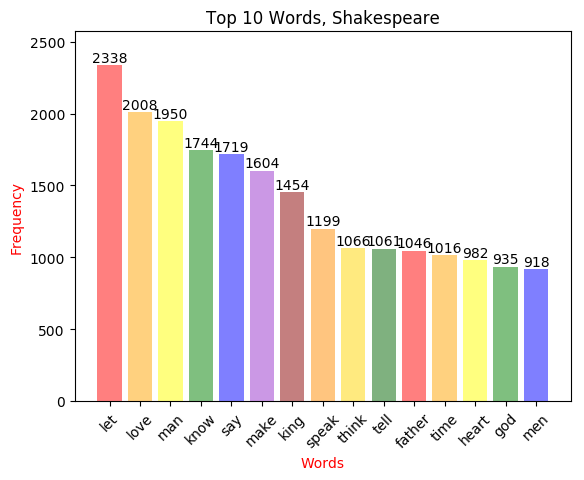

In [12]:
if singleDoc is True:
    # Use case one, analyze top 10 most frequent words from a single text

    textFilepath = os.path.join(dataHome, 'Hamlet.txt')

    # get tokens
    tokens = getTokensFromSingleText(textFilepath)

    # get frequency
    freq = getFreq(tokens)

    title = 'Top 10 Words, Hamlet'

    imgFilepath = os.path.join(dataResults, 'hamletTopTenPlainText.png')

    dpi = 300

    plotTopTen(freq, title, imgFilepath, dpi)
else:
    # Use case two, analyze top 10 most frequent words from a corpus root

    tokens = getTokensFromScan(dataHome)

    # get frequency
    freq = getFreq(tokens)

    title = 'Top 10 Words, Shakespeare'

    imgFilepath = os.path.join(dataResults, 'starTrekTopTenPlainText.png')

    dpi = 300

    plotTopTen(freq, title, imgFilepath, dpi)


## VOILA!